<a href="https://colab.research.google.com/github/crsimmons1/lifeexpectancy/blob/master/Regression/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KNN with Regression**

In [0]:
import pandas as pd
import numpy as np

# Import data
data= pd.read_csv("cleaned_data.csv")

# Split in X and y 
y = pd.DataFrame(data.LifeExpectancy)
X = data.drop(columns=['LifeExpectancy','TExp', 'Year'])

#Train-test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=33)

## KNN for a Row, by Hand (Numpy/Pandas) 

In [2]:
# Define a distance metric
def euclidean_distance(row1, row2):
    instance1 = np.array(row1) 
    instance2 = np.array(row2)
    return np.linalg.norm(row1 - row2)

# Verify on two rows 
print(euclidean_distance(X_train.iloc[3], X_test.iloc[44]))

3873551.8350223997


In [0]:
distances = [] 
def get_neighbors(training_X, training_y, test_row, k, distance):
    for index in range(len(training_X)): #for every training row ...
        dist = distance(test_row, training_X.iloc[index]) # ... find the distance between that and the test row 
        distances.append((training_X.iloc[index], dist, training_y.iloc[index])) #...append it to an empty list 
    distances.sort(key=lambda x: x[1]) # sort these distances
    neighbors = distances[:k] #take the top most k distances
    return(neighbors) #return the list

In [4]:
X_train.iloc[5]

Status            0.000000e+00
AdultMortality    1.200000e+01
InfantDeaths      0.000000e+00
Alcohol           4.140000e+00
Expenditure       3.986518e+01
HepB              8.204859e+01
Measles           1.800000e+01
BMI               4.940000e+01
5deaths           0.000000e+00
Polio             8.700000e+01
TExpenditure      7.940000e+00
Diphtheria        8.700000e+01
HIV               1.000000e-01
GDP               2.214732e+03
Population        3.779247e+06
ThinJuvenile      3.000000e+00
ThinChild         3.000000e+00
IncomeComp        0.000000e+00
Schooling         1.210000e+01
Name: 312, dtype: float64

In [5]:
get_neighbors(X_train, # input variables 
              y_train, # the output variables 
              X_test.iloc[5], # what 
              3, #K
              distance=euclidean_distance) #some distance metric

[(Status            0.000000e+00
  AdultMortality    8.800000e+01
  InfantDeaths      1.000000e+00
  Alcohol           3.000000e-02
  Expenditure       2.078393e+03
  HepB              9.900000e+01
  Measles           0.000000e+00
  BMI               6.750000e+01
  5deaths           1.000000e+00
  Polio             9.900000e+01
  TExpenditure      1.930000e+00
  Diphtheria        9.900000e+01
  HIV               1.000000e-01
  GDP               5.557200e+04
  Population        5.465236e+06
  ThinJuvenile      3.300000e+00
  ThinChild         3.100000e+00
  IncomeComp        7.870000e-01
  Schooling         1.380000e+01
  Name: 1242, dtype: float64, 22442.176115492563, LifeExpectancy    73.8
  Name: 1242, dtype: float64), (Status            1.000000e+00
  AdultMortality    9.300000e+01
  InfantDeaths      0.000000e+00
  Alcohol           1.099000e+01
  Expenditure       9.703068e+03
  HepB              7.096505e+01
  Measles           2.000000e+00
  BMI               5.590000e+01
  5dea

## KNN via sklearn

### Initial Model

In [8]:
from sklearn.neighbors import KNeighborsRegressor

# instantiate the model, set the number of neighbors to consider to 3
reg_unscale = KNeighborsRegressor(n_neighbors=3)

# fit the model to training data
reg_unscale.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [9]:
# Predict for X_test
y_pred = reg_unscale.predict(X_test)

# MSE
(((y_pred - y_test) ** 2).sum()) / len(y_pred)

LifeExpectancy    88.281026
dtype: float64

In [13]:
from sklearn import metrics
from math import sqrt 

RESULTS = {}
def evaluate_model(y_true, y_pred):# Function to evaluate model 
    return {
        "MAE": metrics.mean_absolute_error(y_true, y_pred),
        "exp_var": metrics.explained_variance_score(y_true, y_pred),
        "MSE" : metrics.mean_squared_error(y_true, y_pred),
        "RMSE" : sqrt(metrics.mean_squared_error(y_true, y_pred)),
        "r^2" : metrics.r2_score(y_true, y_pred),
           }

# Metrics for the training 
y_pred = reg_unscale.predict(X_train)
RESULTS["MLR_train"] = evaluate_model(y_train, y_pred)

# Metrics for the testing 
y_pred = reg_unscale.predict(X_test)
RESULTS["MLR_test"] = evaluate_model(y_test, y_pred)

pd.DataFrame(RESULTS)



,MLR_train,MLR_test
MAE,4.926453,7.210388
exp_var,0.491991,0.076402
MSE,43.839515,88.281026
RMSE,6.621142,9.395798
r^2,0.491944,0.076369


### Initial Scaled Model


In [0]:
# Scale the Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from sklearn.neighbors import KNeighborsRegressor

# instantiate the model, set the number of neighbors to consider to 5
reg5 = KNeighborsRegressor(n_neighbors=3)

# fit the model to training data
reg5.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [16]:
# Metrics for the training 
y_pred = reg5.predict(X_train)
RESULTS["s5_train"] = evaluate_model(y_train, y_pred)

# Metrics for the testing 
y_pred = reg5.predict(X_test)
RESULTS["5s_test"] = evaluate_model(y_test, y_pred)

pd.DataFrame(RESULTS)

,MLR_train,MLR_test,s5_train,5s_test
MAE,4.926453,7.210388,1.125580,1.889415
exp_var,0.491991,0.076402,0.963792,0.913563
MSE,43.839515,88.281026,3.130317,8.266277
RMSE,6.621142,9.395798,1.769270,2.875113
r^2,0.491944,0.076369,0.963723,0.913515


### Find best K value

RSME is the metric which was used to evaluate which value of K is best. Based on the plot of K vs. RSME of test data, 7-9 would be optimal choices. Grid search identified 9 as the optimal value. 

#### Using RSME on Test Data

In [0]:
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
from sklearn import neighbors


rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values

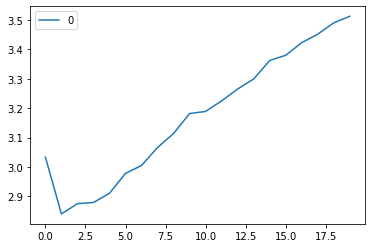

In [18]:
#plotting the rmse values against k values
RSMEp = pd.DataFrame(rmse_val) #elbow curve 
RSMEp.plot()

#### Using Grid Search

In [19]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 2}

## Fit the Model 

In [21]:
from sklearn.neighbors import KNeighborsRegressor

# instantiate the model, k=2
reg2 = KNeighborsRegressor(n_neighbors=2)

# fit the model to training data
reg2.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [22]:
# Metrics for the training 
y_pred = reg2.predict(X_train)
RESULTS["s2_train"] = evaluate_model(y_train, y_pred)

# Metrics for the testing 
y_pred = reg2.predict(X_test)
RESULTS["s2_test"] = evaluate_model(y_test, y_pred)

pd.DataFrame(RESULTS)

,MLR_train,MLR_test,s5_train,5s_test,s2_train,s2_test
MAE,4.926453,7.210388,1.125580,1.889415,0.876963,1.773964
exp_var,0.491991,0.076402,0.963792,0.913563,0.974916,0.915630
MSE,43.839515,88.281026,3.130317,8.266277,2.165559,8.066815
RMSE,6.621142,9.395798,1.769270,2.875113,1.471584,2.840214
r^2,0.491944,0.076369,0.963723,0.913515,0.974903,0.915602
